In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.optimize as opt
from scipy.optimize import curve_fit
import os
import re


In [2]:
def powerlaw(t,K,n,Af,tau):
    return Af*(1-np.exp(-K*np.power(t+tau,n)/Af))#/Af))


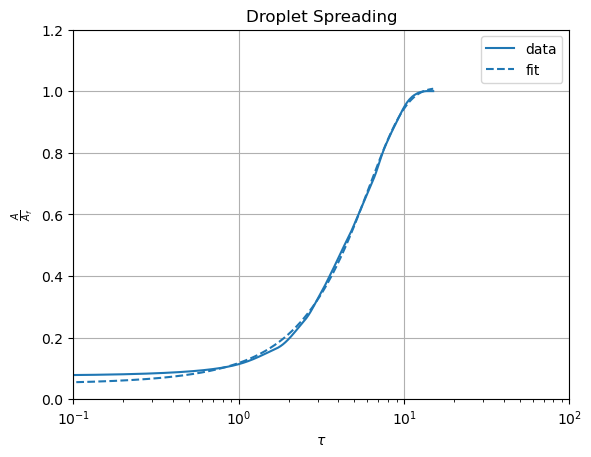

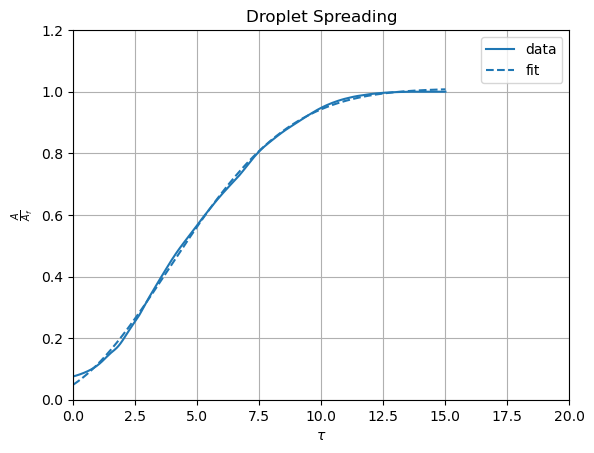

In [5]:
fit_param=np.zeros([1,4])

temp=pd.read_csv('./monitor/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    # === Plot Data === #
xdata=data['Time'].to_numpy()
ydata=np.pi*np.power(data['VoF'].to_numpy(),2)
A_f=ydata[-1]
ydata=ydata/A_f
p=plt.semilogx(xdata,ydata,label='data')
    # === Fit model === #
    #popt, pcov = curve_fit(powerlaw, data['Time'], np.pi*np.power(data['Wetted'],2),[1,0.5,1,8])
popt, pcov = curve_fit(powerlaw, xdata, ydata,bounds=(10**-3,[10,10,10,2]))
fit_param[0,:]=popt
p=plt.semilogx(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')


plt.ylim([0,1.2])
plt.xlim([1e-1,1e2])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{A}{A_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

s=plt.plot(xdata,ydata,label='data')
s=plt.plot(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')

plt.ylim([0,1.2])
plt.xlim([0,20])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{A}{A_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

plt.show()
    

In [7]:
#K,n,A_f,tau
fit_param

array([[0.00294196, 1.82291586, 1.0400344 , 2.        ]])

In [4]:
data

,Timestep,Time,VOF,VOF.1,Total,Drop,Wetted,VoF,CL,CA,CA.1,C,alpha
1,0.0,0.000,1.0,0.0,4.18856,1.974970,0.289938,0.430123,0.000000,2.605260,149.270996,0.289938,0.000000
2,1.0,0.005,1.0,0.0,4.18868,1.974980,0.290439,0.430375,0.100194,2.604480,149.225998,0.293105,0.001725
3,2.0,0.010,1.0,0.0,4.18880,1.974990,0.290985,0.430650,0.109187,2.603630,149.177002,0.296057,0.003752
4,3.0,0.015,1.0,0.0,4.18892,1.975000,0.291542,0.430930,0.111383,2.602750,149.126999,0.298644,0.005731
5,4.0,0.020,1.0,0.0,4.18904,1.975020,0.292109,0.431214,0.113384,2.601860,149.076004,0.301116,0.007763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,2996.0,14.980,1.0,0.0,4.24902,0.930772,1.620670,1.560950,-0.000595,0.948978,54.372398,1.644960,-0.005497
2998,2997.0,14.985,1.0,0.0,4.24901,0.930772,1.620670,1.560950,-0.000598,0.948979,54.372501,1.645100,-0.005528
2999,2998.0,14.990,1.0,0.0,4.24900,0.930773,1.620670,1.560950,-0.000601,0.948981,54.372601,1.645240,-0.005558
3000,2999.0,14.995,1.0,0.0,4.24900,0.930774,1.620660,1.560940,-0.000604,0.948983,54.372700,1.645380,-0.005589
